Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 3)                 2355      
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 2,359
Trainable params: 2,359
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
65/65 [==============================] - 1s 5ms/step - loss: 0.6165 - acc: 0.5113 - val_loss: 0.5142 - val_acc: 0.5129
Epoch 2/100
65/65 [==============================] - 0s 3ms/step - loss: 0.4665 - acc: 0.6908 - val_loss: 0.4376 - val_acc: 0.8295
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 0.4122 - acc: 0.8825 - val_loss: 0.3979 - val_acc: 0.9207
Epoch 4/100
65/65 [==============================] - 0s

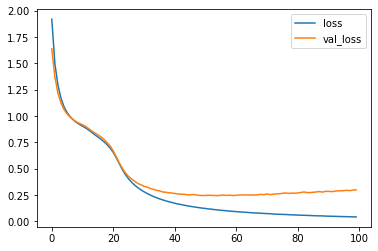

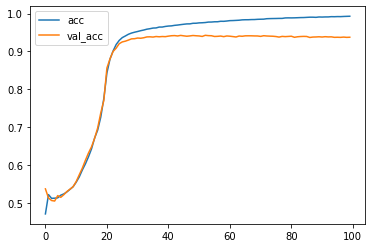

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Dec 26 18:37:08 2018

@author: joshua
"""

from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import np_utils#for onehot

(x_train,y_train),(x_test,y_test) = mnist.load_data()
#把二維data拉成一維
x_train = x_train.reshape((-1,28*28)).astype('float32')/255.0
x_test = x_test.reshape((-1,28*28)).astype('float32')/255.0
index = np.where((y_train==6)|(y_train==8))[0]#拿6跟8做binary辨識(兩個比較像)
y_binary = y_train[index]
x_binary = x_train[index]
y_binary[y_binary==6] = 0
y_binary[y_binary==8] = 1
y_train_onehot = np_utils.to_categorical(y_train)
#%%binary
model_binary = Sequential()
model_binary.add(Dense(3,input_dim = 784,activation='sigmoid'))
model_binary.add(Dense(1,activation='sigmoid'))
model_binary.summary()
model_binary.compile(loss = 'binary_crossentropy',optimizer='adam', metrics=['acc'])
training_binary = model_binary.fit(x=x_binary,y=y_binary,validation_split = 0.3,epochs = 100, batch_size = 128,verbose = 1)
#batch = 一批資料同時決定調多少權重
#%%onehot
model_categorical = Sequential()
model_categorical.add(Dense(32,input_dim = 784,activation = 'sigmoid'))
model_categorical.add(Dense(8,activation='softmax'))
model_categorical.add(Dense(10,activation='softmax'))
model_categorical.summary()
model_categorical.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['acc'])
training_categorical = model_categorical.fit(x = x_train, y = y_train_onehot,validation_split = 0.3,epochs = 100,batch_size = 128,verbose = 1)
#%%
plt.plot(training_categorical.history['loss'],label = 'loss')
plt.plot(training_categorical.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()
plt.plot(training_categorical.history['acc'],label = 'acc')
plt.plot(training_categorical.history['val_acc'],label = 'val_acc')
plt.legend()
plt.show()